In [1]:
# Baseado no exemplo: https://www.kaggle.com/thebrownviking20/intro-to-recurrent-neural-networks-lstm-gru

In [22]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

from sklearn.preprocessing import MinMaxScaler
from keras.layers import SimpleRNN
from keras.models import Sequential
from numpy.random import seed
#from tensorflow import set_random_seed

In [23]:
seed(42)
#set_random_seed(42)

plt.rcParams['figure.figsize'] = 16,4

In [24]:
SPLIT_DATE = '2015/01/01'
WINDOW_SIZE = 30

# Importar Bases

In [25]:
import os.path
def path_base(base_name,folder):
    current_dir = os.path.abspath(os.path.join(os.getcwd()))
    print(current_dir)
    data_dir = current_dir.replace('notebook',folder)
    print(data_dir)
    data_base = data_dir + '\\' + base_name
    print(data_base)
    return data_base

In [26]:
df = pd.read_csv(path_base('db_IBM_stocks.csv','data'),index_col='Date')
df.head(5)

C:\MyGit\py_redesneurais\notebook
C:\MyGit\py_redesneurais\data
C:\MyGit\py_redesneurais\data\db_IBM_stocks.csv


,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,82.45,82.55,80.81,82.06,11715200,IBM
2006-01-04,82.20,82.50,81.33,81.95,9840600,IBM
2006-01-05,81.40,82.90,81.00,82.50,7213500,IBM
2006-01-06,83.95,85.03,83.41,84.95,8197400,IBM
2006-01-09,84.10,84.25,83.38,83.73,6858200,IBM


In [27]:
df['Average'] = (df['High'] + df['Low'])/2
df = df[['Average']]

df.head(5)

,Average
Date,
2006-01-03,81.680
2006-01-04,81.915
2006-01-05,81.950
2006-01-06,84.220
2006-01-09,83.815


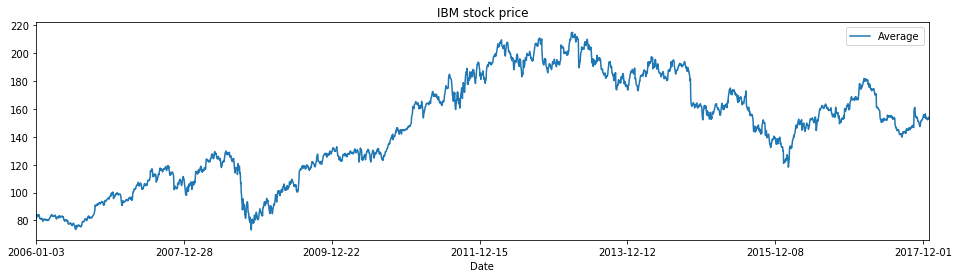

In [28]:
df.plot(legend=True)
plt.title('IBM stock price')
plt.show()

In [9]:
df_train = df[df.index < SPLIT_DATE].copy()
df_test = df[df.index >= SPLIT_DATE].copy()
SPLIT_DATE

'2015/01/01'

In [10]:
#scaler = MinMaxScaler()
#df_train['Average'] = scaler.fit_transform(df_train['Average'].values.reshape(-1, 1))
#df_test['Average'] = scaler.transform(df_test['Average'].values.reshape(-1, 1))

In [11]:
 def gen_rnn_inputs(df, window_size):
    X, y = [], []
    averages = df['Average'].values
    
    for i in range(window_size, len(df)):
        X.append(averages[i-window_size: i])
        y.append(averages[i])
        
    return np.array(X), np.array(y)

In [12]:
X_train, y_train = gen_rnn_inputs(df_train, WINDOW_SIZE)
X_test, y_test = gen_rnn_inputs(df_test, WINDOW_SIZE)

In [13]:
model = Sequential()
model.add(SimpleRNN(1, activation='relu', input_shape=(WINDOW_SIZE, 1)))
model.compile(optimizer='adam',loss='mean_squared_error')
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_1 (SimpleRNN)     (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.fit(np.expand_dims(X_train, axis=-1), y_train, epochs=100, batch_size=8, verbose=2)

Epoch 1/100
 - 1s - loss: 6.8441
Epoch 2/100
 - 1s - loss: 6.7593
Epoch 3/100
 - 1s - loss: 6.8252
Epoch 4/100
 - 1s - loss: 6.7220
Epoch 5/100
 - 1s - loss: 6.7657
Epoch 6/100
 - 1s - loss: 6.6487
Epoch 7/100
 - 1s - loss: 6.7274
Epoch 8/100
 - 1s - loss: 6.6131
Epoch 9/100
 - 1s - loss: 6.6103
Epoch 10/100
 - 1s - loss: 6.4847
Epoch 11/100
 - 1s - loss: 6.4726
Epoch 12/100
 - 1s - loss: 6.3977
Epoch 13/100
 - 1s - loss: 6.3724
Epoch 14/100
 - 1s - loss: 6.3794
Epoch 15/100
 - 1s - loss: 6.2895
Epoch 16/100
 - 1s - loss: 6.2707
Epoch 17/100
 - 1s - loss: 6.2324
Epoch 18/100
 - 1s - loss: 6.2568
Epoch 19/100
 - 1s - loss: 6.1739
Epoch 20/100
 - 1s - loss: 6.2854
Epoch 21/100
 - 1s - loss: 6.0748
Epoch 22/100
 - 1s - loss: 6.1860
Epoch 23/100
 - 1s - loss: 6.1344
Epoch 24/100
 - 1s - loss: 6.0240
Epoch 25/100
 - 1s - loss: 6.0295
Epoch 26/100
 - 1s - loss: 6.1355
Epoch 27/100
 - 1s - loss: 6.0896
Epoch 28/100
 - 1s - loss: 5.9423
Epoch 29/100
 - 1s - loss: 5.7508
Epoch 30/100
 - 1s - lo

In [19]:
y_pred = model.predict(np.expand_dims(X_test, axis=-1))

In [20]:
df_test_preds = df_test.copy()
df_test_preds['Average'] = np.zeros(WINDOW_SIZE).tolist() + y_test.reshape(-1,1).squeeze().tolist()
df_test_preds['Pred'] = np.zeros(WINDOW_SIZE).tolist() + y_pred.reshape(-1,1).squeeze().tolist()

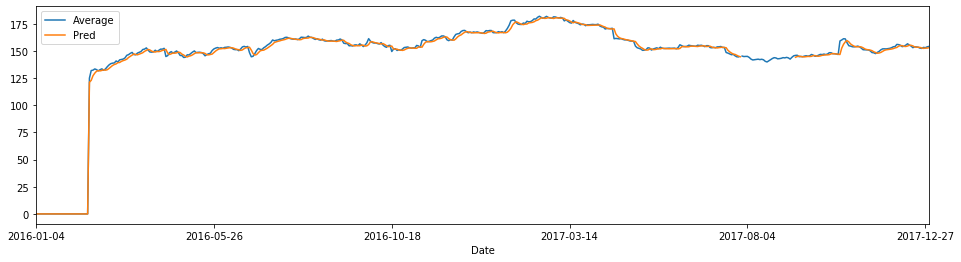

In [21]:
df_test_preds.plot(legend=True)